In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
import os

In [0]:
%tensorflow_version 1.x
import tensorflow
import os
import tqdm
import matplotlib.pyplot as plt
from keras import preprocessing, layers, models, optimizers
import numpy as np

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"olehandrus","key":"4cbbff5bf2337f7b1a69f8bc8a0f07ae"}'}

In [0]:
image_size = 299
batch_size = 32

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:33<00:00, 90.3MB/s]
100% 2.29G/2.29G [00:33<00:00, 74.4MB/s]


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!ls chest_xray/

ls: cannot access 'chest_xray/': No such file or directory


In [0]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [0]:
train_dir = 'chest_xray/train'
test_dir = 'chest_xray/test'
input_shape = (image_size,image_size,3)


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))                       # DROPOUT
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4'

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 128)      

In [0]:
train_datagen = preprocessing.image.ImageDataGenerator(rescale=1. / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest')

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [0]:
test_datagen = preprocessing.image.ImageDataGenerator(rescale=1. / 255)

In [0]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=40,
    epochs= 20, # use more epochs if you are not limited by 1 hour limit
    validation_data=test_generator,
    validation_steps=5)

Epoch 1/20
40/40 [==============================] - 36s 900ms/step - loss: 0.5460 - acc: 0.7531 - val_loss: 0.5885 - val_acc: 0.6938
Epoch 2/20
40/40 [==============================] - 34s 862ms/step - loss: 0.4354 - acc: 0.7969 - val_loss: 0.4762 - val_acc: 0.7750
Epoch 3/20
40/40 [==============================] - 35s 869ms/step - loss: 0.3384 - acc: 0.8539 - val_loss: 0.5571 - val_acc: 0.7812
Epoch 4/20
40/40 [==============================] - 34s 860ms/step - loss: 0.3234 - acc: 0.8656 - val_loss: 0.1715 - val_acc: 0.8889
Epoch 5/20
40/40 [==============================] - 36s 891ms/step - loss: 0.2810 - acc: 0.8875 - val_loss: 0.8795 - val_acc: 0.7563
Epoch 6/20
40/40 [==============================] - 35s 877ms/step - loss: 0.2693 - acc: 0.8852 - val_loss: 0.4343 - val_acc: 0.8500
Epoch 7/20
40/40 [==============================] - 35s 866ms/step - loss: 0.2454 - acc: 0.9000 - val_loss: 0.5968 - val_acc: 0.7625
Epoch 8/20
40/40 [==============================] - 34s 841ms/step - 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 128)      

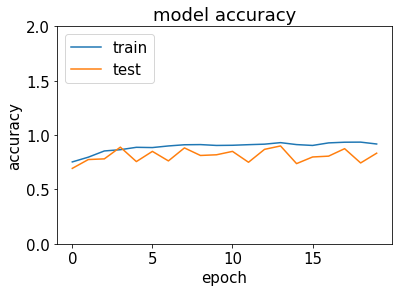

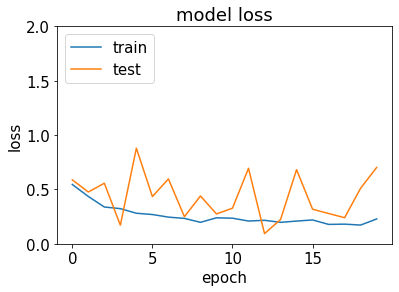

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,2)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# График оценки loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0, 2)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
import numpy as np

In [0]:
val_dir = 'chest_xray/val'
val_datagen = preprocessing.image.ImageDataGenerator(rescale=1. / 255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


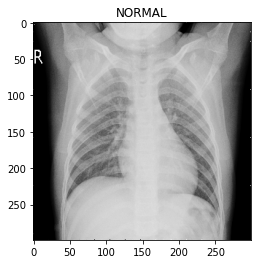

[[0.48256296]]


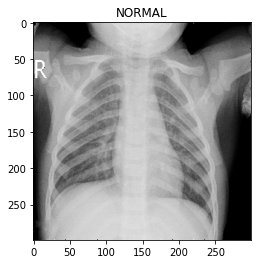

[[0.10543451]]


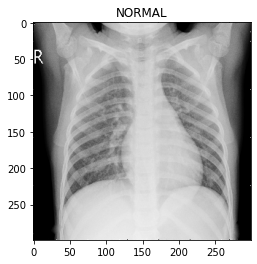

[[0.23061417]]


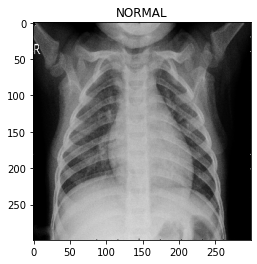

[[0.7568433]]


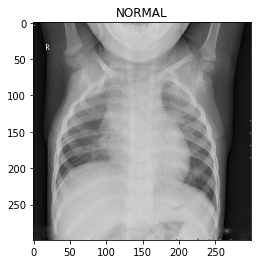

[[0.69489396]]


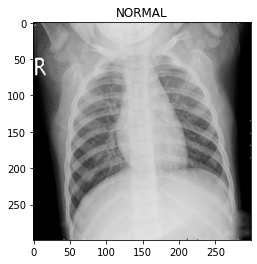

[[0.24590467]]


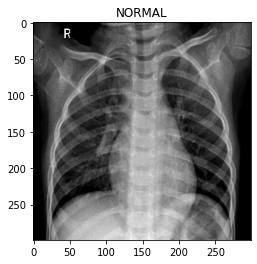

[[0.48087066]]


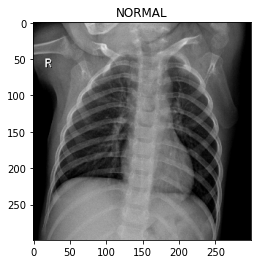

[[0.10434525]]


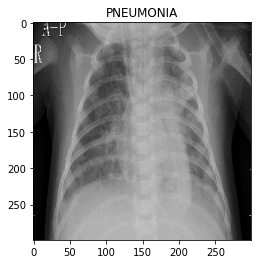

[[0.9585633]]


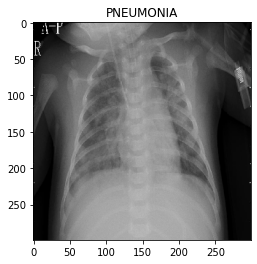

[[0.97599083]]


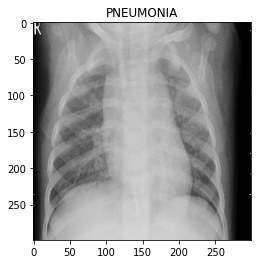

[[0.9192127]]


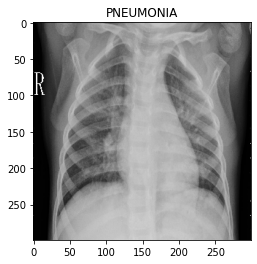

[[0.8711933]]


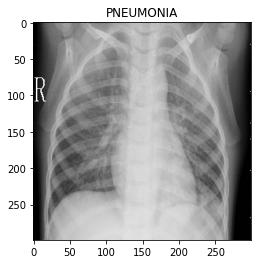

[[0.80871654]]


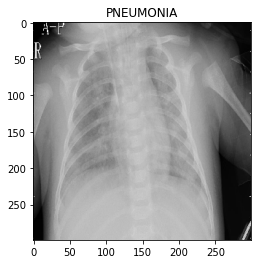

[[0.9843317]]


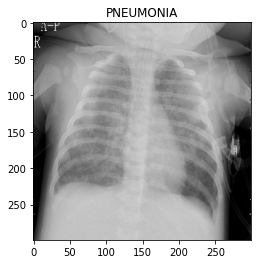

[[0.74342406]]


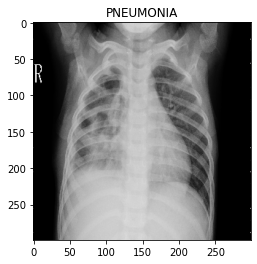

[[0.91226494]]


In [0]:
true_res = list()
predicted_res = list()
for i in val_generator.filenames:
    path = i.split("/")
    if (path[0] == "NORMAL"):
      true_res.append(0)
    else:
      true_res.append(1)
    path_im = "chest_xray/val/" + i
    img = preprocessing.image.load_img(path_im, target_size=(image_size, image_size))
    plt.imshow(img)
    plt.title(path[0])
    plt.show()  
    x = preprocessing.image.img_to_array(img)
    x /=255
    x = np.expand_dims(x, axis=0)
    prediction = model.predict(x)
    print(prediction)
    if (prediction <=0.5):
      predicted_res.append(0)
    else:
      predicted_res.append(1)

In [0]:
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6 2]
 [0 8]]


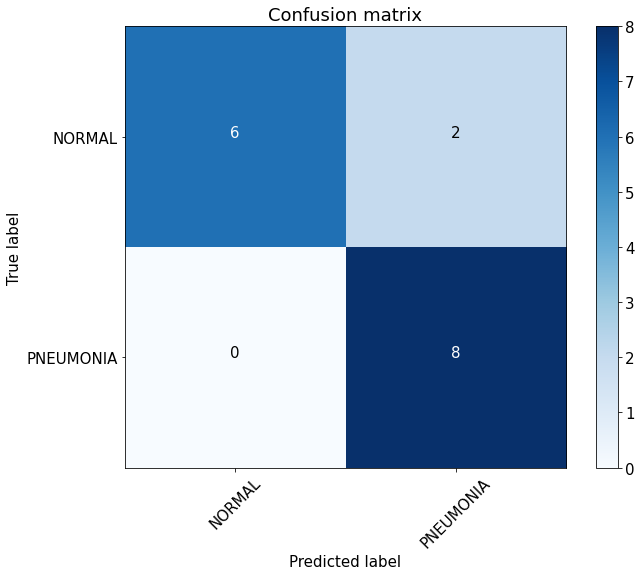

In [0]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(true_res,predicted_res)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=["NORMAL", "PNEUMONIA"],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()